# **차량 공유업체의 차량 파손 여부 분류하기**

## 0.미션

* 1) 미션1 : Data Preprocessing
    - **과제 수행 목표**
        - 모델링 수행을 위해 적절한 폴더 및 파일로 **일관성 있게 정리**해야 합니다.
        - 제공된 데이터 : Car_Images.zip
            * Car_Images : 차량의 정상/파손 이미지 무작위 수집

* 2) 미션2 : CNN 모델링
    - **과제 수행 목표**
        - Tensorflow Keras를 이용하여 모델을 3개 이상 생성하세요.
            - 모델 구조와 파라미터는 자유롭게 구성하세요.
            - 단, 세부 목차에서 명시한 부분은 지켜주세요.

* 3) 미션3 : Data Augmentation & Transfer Learning
    - **과제 수행 목표**
        - 성능 개선을 위해 다음의 두가지를 시도하세요.
            * Data Augmentation을 적용하세요.(Image Generator)
            * Transfer Learning(VGG16)
* 성능 가이드
    * Accuracy : 0.34~0.74

## 1.환경설정

* **세부 요구사항**
    - 경로 설정 : 다음의 두가지 방법 중 하나를 선택하여 폴더를 준비하고 데이터를 로딩하시오.
        * 구글 드라이브 바로 밑에 project 폴더를 만들고,
        * 데이터 파일을 복사해 넣습니다.
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다.
        * 필요하다고 판단되는 라이브러리를 추가하세요.

### (1) 경로 설정

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### (2) 라이브러리 불러오기

In [39]:
import zipfile, os, random, shutil, glob, yaml, json
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

### (3) 데이터 불러오기

#### 1) 데이터 압축 해제

In [40]:
path = '/content/drive/MyDrive/에이블/미니프로젝트6차_3,4일차/'

In [41]:
file1 = 'Car_Images.zip'
path + file1

'/content/drive/MyDrive/에이블/미니프로젝트6차_3,4일차/Car_Images.zip'

In [5]:
# 압축 해제

data = zipfile.ZipFile(path+file1)

try :
    print('압축을 해제합니다.')
    data.extractall(path)
    print('압축 해제가 완료되었습니다.')
except :
    pass
    print('압축이 이미 해제되었거나 이미 폴더가 존재합니다.')

압축을 해제합니다.
압축 해제가 완료되었습니다.


#### 2) 데이터 조회

In [42]:
# 폴더별 이미지 데이터 갯수 확인

print(f"정상 차량 이미지 데이터는 {len(glob.glob(path+'normal/*'))}장 입니다.")
print(f"파손 차량 이미지 데이터는 {len(glob.glob(path+'abnormal/*'))}장 입니다.")

정상 차량 이미지 데이터는 302장 입니다.
파손 차량 이미지 데이터는 303장 입니다.


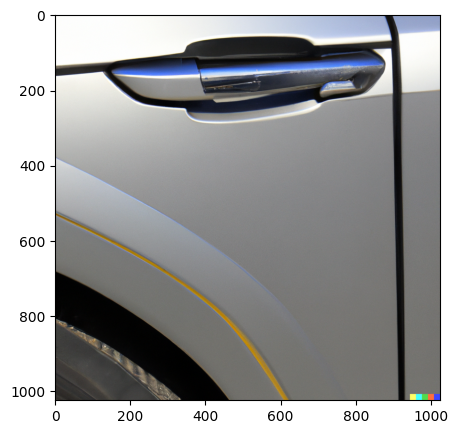

이미지 데이터의 형태는 다음과 같습니다 : (1024, 1024, 3)


In [43]:
# 정상 차량 랜덤 이미지 확인 및 형태 확인

rand_n = random.randint( 0, len(glob.glob(path+'normal/*'))-1 )

plt.figure(figsize=(5,5))
img = plt.imread(glob.glob(path+'normal/*')[rand_n])
plt.imshow(img)
plt.show()

print(f'이미지 데이터의 형태는 다음과 같습니다 : {img.shape}')

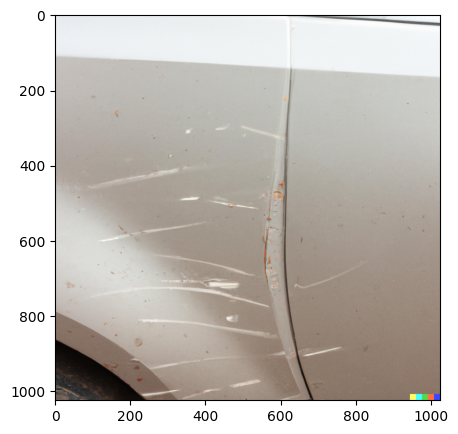

이미지 데이터의 형태는 다음과 같습니다 : (1024, 1024, 3)


In [44]:
# 파손 차량 랜덤 이미지 확인 및 형태 확인

rand_n = random.randint( 0, len(glob.glob(path+'abnormal/*'))-1 )

plt.figure(figsize=(5,5))
img = plt.imread(glob.glob(path+'abnormal/*')[rand_n])
plt.imshow(img)
plt.show()

print(f'이미지 데이터의 형태는 다음과 같습니다 : {img.shape}')

## 2.데이터 전처리

### (1) 모델링 I용 전처리
* 모델링을 위한 데이터 구조 만들기
    * X : 이미지를 array로 변환합니다.
    * Y : 이미지 갯수만큼 normal - 0, abnormal - 1 로 array를 만듭니다.

#### 1) Y : 클래스 만들기
- **세부요구사항**
    - 전체 데이터에 대한 Y를 생성합니다.
    - normal, abnormal 데이터의 수를 확인하고 normal을 0, abnormal을 1로 지정합니다.

In [45]:
import os
# test 폴더 만들기
!mkdir /content/drive/MyDrive/에이블/미니프로젝트6차_3,4일차/Car_images/test

# validation 폴더 만들기
!mkdir /content/drive/MyDrive/에이블/미니프로젝트6차_3,4일차/Car_images/validation

!mkdir /content/drive/MyDrive/에이블/미니프로젝트6차_3,4일차/Car_images/test/normal
!mkdir /content/drive/MyDrive/에이블/미니프로젝트6차_3,4일차/Car_images/test/abnormal
!mkdir /content/drive/MyDrive/에이블/미니프로젝트6차_3,4일차/Car_images/validation/normal
!mkdir /content/drive/MyDrive/에이블/미니프로젝트6차_3,4일차/Car_images/validation/abnormal

mkdir: cannot create directory ‘/content/drive/MyDrive/에이블/미니프로젝트6차_3,4일차/Car_images/test’: No such file or directory
mkdir: cannot create directory ‘/content/drive/MyDrive/에이블/미니프로젝트6차_3,4일차/Car_images/validation’: No such file or directory
mkdir: cannot create directory ‘/content/drive/MyDrive/에이블/미니프로젝트6차_3,4일차/Car_images/test/normal’: No such file or directory
mkdir: cannot create directory ‘/content/drive/MyDrive/에이블/미니프로젝트6차_3,4일차/Car_images/test/abnormal’: No such file or directory
mkdir: cannot create directory ‘/content/drive/MyDrive/에이블/미니프로젝트6차_3,4일차/Car_images/validation/normal’: No such file or directory
mkdir: cannot create directory ‘/content/drive/MyDrive/에이블/미니프로젝트6차_3,4일차/Car_images/validation/abnormal’: No such file or directory


In [46]:
import random, shutil
import os

tr_n_path = '/content/drive/MyDrive/에이블/미니프로젝트6차_3,4일차/Car_images/train/normal/'
tr_ab_path = '/content/drive/MyDrive/에이블/미니프로젝트6차_3,4일차/Car_images/train/abnormal/'

te_n_path = '/content/drive/MyDrive/에이블/미니프로젝트6차_3,4일차/Car_images/test/normal/'
te_ab_path = '/content/drive/MyDrive/에이블/미니프로젝트6차_3,4일차/Car_images/test/abnormal/'

val_n_path = '/content/drive/MyDrive/에이블/미니프로젝트6차_3,4일차/Car_images/validation/normal/'
val_ab_path = '/content/drive/MyDrive/에이블/미니프로젝트6차_3,4일차/Car_images/validation/abnormal/'

# 전체 이미지 갯수를 확인합니다.
len(os.listdir(tr_n_path)) , len(os.listdir(tr_ab_path))

FileNotFoundError: ignored

#### 2) X : 데이터 리스트 통합
- **세부요구사항**
    - 전체 이미지 데이터를 하나의 리스트로 통합합니다.

In [47]:
# test 사이즈 : 전체 이미지의 20%
te_data_num = [round(len(os.listdir(tr_n_path))*0.2), round(len(os.listdir(tr_ab_path))*0.2)]

# validation 사이즈 : test를 제외한 나머지 중에서 20%
val_data_num = [round((len(os.listdir(tr_n_path))-te_data_num[0])*0.2) ,
                round((len(os.listdir(tr_n_path))-te_data_num[1])*0.2)]

# train 사이즈
train_data_num = [len(os.listdir(tr_n_path)) - te_data_num[0] - val_data_num[0],
                  len(os.listdir(tr_ab_path))- te_data_num[1] - val_data_num[1]]


FileNotFoundError: ignored

In [48]:
random.seed(2023)

for n in range(te_data_num[0]):
    shutil.move(tr_n_path+random.choice(os.listdir(tr_n_path)), te_n_path)

for ab in range(te_data_num[1]):
    shutil.move(tr_ab_path+random.choice(os.listdir(tr_ab_path)), te_ab_path)

# 추출 후 이미지 갯수 확인
len(os.listdir(te_n_path)) , len(os.listdir(te_ab_path))


FileNotFoundError: ignored

#### 3) 데이터셋 분리
- **세부요구사항**
    - 데이터 스플릿의 비율은 train set : validation set : test set = 8 : 1: 1 로 설정하세요.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#Val 추출
random.seed(2023)

for n in range(val_data_num[0]):
    shutil.move(tr_n_path+random.choice(os.listdir(tr_n_path)), val_n_path)

for ab in range(val_data_num[1]):
    shutil.move(tr_ab_path+random.choice(os.listdir(tr_ab_path)), val_ab_path)

# 추출 후 이미지 갯수 확인
len(os.listdir(val_n_path)) , len(os.listdir(val_ab_path))


(48, 48)

In [ ]:
dataset_path='/content/drive/MyDrive/에이블/미니프로젝트6차_3,4일차/'
shutil.copytree(tr_ab_path, dataset_path+'copy_images/trainset')
shutil.copytree(te_ab_path, dataset_path+'copy_images/testset')
shutil.copytree(val_ab_path, dataset_path+'copy_images/validset')


'/content/drive/MyDrive/Datasets/copy_images/validset'

In [ ]:
trr=dataset_path+'copy_images/trainset/'
for filename in os.listdir(trr):
    os.rename(trr+filename, trr+'ab_'+filename)

tee=dataset_path+'copy_images/testset/'
for filename in os.listdir(tee):
    os.rename(tee+filename, tee+'ab_'+filename)

vall=dataset_path+'copy_images/validset/'
for filename in os.listdir(vall):
    os.rename(vall+filename, vall+'ab_'+filename)




In [ ]:
from distutils.dir_util import copy_tree

copy_tree(tr_n_path, dataset_path+'copy_images/trainset')
copy_tree(te_n_path, dataset_path+'copy_images/testset')
copy_tree(val_n_path, dataset_path+'copy_images/validset')


#### 4) X : image to array
- **세부요구사항**
    * 모델링을 위해서는 np.array 형태로 데이터셋을 만들어야 합니다.
    * Training set / Validation set / Test set의 X는 이미지 형태로 되어있습니다.
    * 이미지 파일을 불러와 Training data, Validation data, Test data 각각 array 형태로 변환해 봅시다.
        * 각 폴더로 부터 이미지 목록을 만들고
        * 이미지 한장씩 적절한 크기로 로딩하여 (keras.utils.load_img)
            * 이미지가 너무 크면 학습시간이 많이 걸리고, 메모리 부족현상이 발생될 수 있습니다.
            * 이미지 크기를 280 * 280 * 3 이내의 크기를 설정하여 로딩하시오.
            * array로 변환 (keras.utils.img_to_array, np.expand_dims)
        * 데이터셋에 추가합니다.(데이터셋도 array)

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix

import os
import numpy as np
from tensorflow import keras
dataset_path='/content/drive/MyDrive/에이블/미니프로젝트6차_3,4일차/'

# 이미지 목록 저장
img_train_list = os.listdir(dataset_path+'copy_images/trainset/')
img_valid_list = os.listdir(dataset_path+'copy_images/validset/')
img_test_list = os.listdir(dataset_path+'copy_images/testset/')

# 메모리, 처리시간을 위해서 이미지 크기 조정
img_size = 280

def img_to_array(img_list, img_path):
    img_array = np.array([np.array(keras.preprocessing.image.load_img(img_path+img,
                                   target_size=(img_size, img_size))) for img in img_list])

    return img_array

x_train = img_to_array(img_train_list, dataset_path+'copy_images/trainset/')
x_test = img_to_array(img_test_list, dataset_path+'copy_images/testset/')
x_val = img_to_array(img_valid_list, dataset_path+'copy_images/validset/')


In [ ]:
y_train=[]
for val in img_train_list:
    if val.startswith('ab_'):
        y_train.append(1)
    else:
        y_train.append(0)

y_test=[]
for val in img_test_list:
    if val.startswith('ab_'):
        y_test.append(1)
    else:
        y_test.append(0)

y_val=[]
for val in img_valid_list:
    if val.startswith('ab_'):
        y_val.append(1)
    else:
        y_val.append(0)

y_train=np.array(y_train)
y_test=np.array(y_test)
y_val=np.array(y_val)


In [ ]:
print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)
print(x_test.shape, y_test.shape)

(388, 280, 280, 3) (388,)
(96, 280, 280, 3) (96,)
(121, 280, 280, 3) (121,)


### (2) 모델링 II용 전처리

#### 1) 데이터셋 분리를 위한 폴더 생성
- **세부요구사항**
    - train, validation, test 데이터셋을 만들기 위해 각각 폴더를 생성하고, 하위 폴더 normal과 abnormal을 생성합니다.
        * 정상 이미지 저장소
            - project/Car_Images_train/normal/
            - project/Car_Images_val/normal/
            - project/Car_Images_test/normal/
        * 파손 이미지 저장소
            - project/Car_Images_train/abnormal/
            - project/Car_Images_val/abnormal/
            - project/Car_Images_test/abnormal/
---
- 직접 탐색기에서 폴더를 생성할 수도 있고, os 모듈을 이용하여 코드로 작성할 수도 있습니다.
    - 참고 자료 : [os document](https://docs.python.org/3/library/os.html)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = 280
train_path = dataset_path+'Car_images/train'
valid_path = dataset_path+'Car_images/validation'

#### 2) 각 폴더에 이미지 데이터 복사
- **세부요구사항**
    - 이전 단계에서 생성한 폴더 normal, abnormal 각각에 이미지 파일을 복사합니다.
    - 데이터 스플릿의 비율은 train set : validation set : test set = 8 : 1 : 1 로 설정하세요.

In [ ]:
train_datagen = ImageDataGenerator(
        rotation_range=20,
        zoom_range = 0.1,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True,
        vertical_flip=True)

valid_datagen = ImageDataGenerator(
        rotation_range=20,
        zoom_range = 0.1,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True,
        vertical_flip=True)


#### 3) Y : 클래스 만들기
- **세부요구사항**
    - Test용 데이터에 대한 Y를 생성합니다.
    - normal, abnormal 데이터의 수를 확인하고 normal을 0, abnormal을 1로 지정합니다.

#### 4) X : image to array
- **세부요구사항**
    * 모델링 II에서는 ImageDataGenerator를 이용하기 때문에 Test data에 대해서만 np.array 형태로 데이터셋을 만들어야 합니다.
    * 이미지 파일을 불러와 Test data 각각 array 형태로 변환해 봅시다.
        * 각 폴더로 부터 이미지 목록을 만들고
        * 이미지 한장씩 적절한 크기로 로딩하여 (keras.utils.load_img)
            * 이미지가 너무 크면 학습시간이 많이 걸리고, 메모리 부족현상이 발생될 수 있습니다.
            * 이미지 크기를 280 * 280 * 3 이내의 크기를 설정하여 로딩하시오.
            * array로 변환 (keras.utils.img_to_array, np.expand_dims)
        * 데이터셋에 추가합니다.(데이터셋도 array)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    directory=train_path,
    target_size=(280,280),
    class_mode='binary',
    batch_size=64)

valid_generator = valid_datagen.flow_from_directory(
    directory=valid_path,
    target_size=(280,280),
    class_mode='binary',
    batch_size=64)


Found 388 images belonging to 2 classes.
Found 96 images belonging to 2 classes.


## 3.모델링 I
* **세부요구사항**
    * 모델을 최소 3개 이상 만들고 성능을 비교합니다.
        * 모델 학습 과정에 알맞은 보조 지표를 사용하세요.
        * 전처리 과정에서 생성한 Validation set을 적절하게 사용하세요.
        * Early Stopping을 반드시 사용하세요.
            * 최적의 가중치를 모델에 적용하세요.

### (1) 모델 1
- **세부요구사항**
    - Conv2D, MaxPooling2D, Flatten, Dense 레이어들을 이용하여 모델을 설계
    - 학습시 validation_data로 validation set을 사용하시오.
    - 반드시 Early Stopping 적용
    - 평가시, confusion matrix, accuracy, recall, precision, f1 score 등을 이용하시오.

In [ ]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.backend import clear_session
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPool2D, Flatten,BatchNormalization, Dropout

from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix

#### 1) 구조 설계

In [ ]:
from keras.models import Model
from keras.optimizers import Adam
from keras.regularizers import l1

l1_reg = tf.keras.regularizers.l1(0.01)

clear_session()

il = Input(shape=(280, 280, 3))

hl = Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', kernel_regularizer=l1_reg)(il)
hl = BatchNormalization()(hl)
hl = MaxPool2D(pool_size=(2,2), strides=(2,2))(hl)

hl = Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', kernel_regularizer=l1_reg)(hl)
hl = BatchNormalization()(hl)
hl = MaxPool2D(pool_size=(2,2), strides=(2,2))(hl)

hl = Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', kernel_regularizer=l1_reg)(hl)
hl = BatchNormalization()(hl)
hl = MaxPool2D(pool_size=(2,2), strides=(2,2))(hl)

hl = Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', kernel_regularizer=l1_reg)(hl)
hl = BatchNormalization()(hl)
hl = MaxPool2D(pool_size=(2,2), strides=(2,2))(hl)

hl = Flatten()(hl)
hl = Dense(512, activation='relu')(hl)
hl = Dense(512, activation='relu')(hl)
hl = BatchNormalization()(hl)
hl = Dropout(0.25)(hl)
ol = Dense(1, activation='sigmoid')(hl)

model1 = Model(il, ol)


#### 2) 학습

In [ ]:

model1.compile(loss=keras.losses.binary_crossentropy, metrics=['accuracy'],
              optimizer=Adam())

model1.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 280, 280, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 280, 280, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 280, 280, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 140, 140, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 140, 140, 32)      9248      
                                                                 
 batch_normalization_1 (Bat  (None, 140, 140, 32)      128   

In [ ]:
es = EarlyStopping(monitor='val_loss',
                   min_delta=0.1,
                   patience=5,
                   verbose=1,
                   restore_best_weights=True)

hist3 = model1.fit(x_train, y_train, validation_data=(x_val, y_val),
                 batch_size=64, epochs=1000, callbacks=[es], verbose=1)


Epoch 1/1000
7/7 [==============================] - 5s 253ms/step - loss: 15.3136 - accuracy: 0.6881 - val_loss: 19.9050 - val_accuracy: 0.5000
Epoch 2/1000
7/7 [==============================] - 1s 134ms/step - loss: 14.0537 - accuracy: 0.9201 - val_loss: 16.6359 - val_accuracy: 0.5000
Epoch 3/1000
7/7 [==============================] - 1s 128ms/step - loss: 13.3832 - accuracy: 0.9381 - val_loss: 13.5833 - val_accuracy: 0.6667
Epoch 4/1000
7/7 [==============================] - 1s 134ms/step - loss: 12.9060 - accuracy: 0.9613 - val_loss: 13.1422 - val_accuracy: 0.6250
Epoch 5/1000
7/7 [==============================] - 1s 151ms/step - loss: 12.3493 - accuracy: 0.9794 - val_loss: 12.6749 - val_accuracy: 0.5833
Epoch 6/1000
7/7 [==============================] - 1s 151ms/step - loss: 11.7841 - accuracy: 0.9845 - val_loss: 12.1404 - val_accuracy: 0.5312
Epoch 7/1000
7/7 [==============================] - 1s 147ms/step - loss: 11.1852 - accuracy: 0.9974 - val_loss: 11.6181 - val_accuracy:

#### 3) 성능 평가
* 평가는 confusion_matrix, classification_report 활용

4/4 [==============================] - 0s 36ms/step


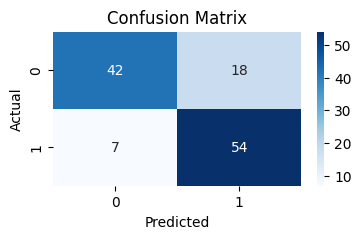

Confusion Matrix:
 [[42 18]
 [ 7 54]]
Accuracy: 0.79
Recall: 0.89
Precision: 0.75
F1 Score: 0.81


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,recall_score,precision_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# 모델로부터 예측을 수행합니다.
pred1 = model1.predict(x_test)
y_pred1 = np.where(pred1 > 0.5, 1, 0)

# Test 데이터 결과 Confusion Matrix 확인
confusion1 = confusion_matrix(y_test, y_pred1)

# Confusion matrix를 시각화합니다.
plt.figure(figsize=(4, 2))
sns.heatmap(confusion1, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
accuracy = accuracy_score(y_test, y_pred1)

# 재현율 계산
recall = recall_score(y_test, y_pred1)

# 정밀도 계산
precision = precision_score(y_test, y_pred1)

# F1 score 계산
f1 = f1_score(y_test, y_pred1)

# 결과 출력
print("Confusion Matrix:\n", confusion1)
print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

### (2) 모델 2
- **세부요구사항**
    - Conv2D, MaxPooling2D, Flatten, Dense 레이어들을 이용하여 모델을 설계
    - 학습시 validation_data로 validation set을 사용하시오.
    - 반드시 Early Stopping 적용
    - 평가시, confusion matrix, accuracy, recall, precision, f1 score 등을 이용하시오.

In [ ]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.backend import clear_session
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPool2D, Flatten

from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix

#### 1) 구조 설계

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.backend import clear_session
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout, ZeroPadding2D, Activation, Add, GlobalAveragePooling2D
from keras.models import Model
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.regularizers import l1

il = Input(shape=(280,280,3))

def conv1_layer(x):
    x = ZeroPadding2D(padding=(3, 3))(x)
    x = Conv2D(64, (7, 7), strides=(2, 2))(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = ZeroPadding2D(padding=(1,1))(x)
    return x

def conv2_layer(x):
    x = MaxPooling2D((3, 3), 2)(x)
    shortcut = x
    for i in range(3):
        if (i == 0):
            x = Conv2D(64, (1, 1), strides=(1, 1), padding='valid')(x)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)

            x = Conv2D(64, (3, 3), strides=(1, 1), padding='same')(x)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)

            x = Conv2D(256, (1, 1), strides=(1, 1), padding='valid')(x)
            shortcut = Conv2D(256, (1, 1), strides=(1, 1), padding='valid')(shortcut)
            x = BatchNormalization()(x)
            shortcut = BatchNormalization()(shortcut)

            x = Add()([x, shortcut])
            x = Activation('relu')(x)

            shortcut = x
        else:
            x = Conv2D(64, (1, 1), strides=(1, 1), padding='valid')(x)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)

            x = Conv2D(64, (3, 3), strides=(1, 1), padding='same')(x)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)

            x = Conv2D(256, (1, 1), strides=(1, 1), padding='valid')(x)
            x = BatchNormalization()(x)

            x = Add()([x, shortcut])
            x = Activation('relu')(x)

            shortcut = x
    return x
def conv3_layer(x):
    x = MaxPooling2D((3, 3), 2)(x)
    shortcut = x
    for i in range(3):
        if (i == 0):
            x = Conv2D(64, (1, 1), strides=(1, 1), padding='valid')(x)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)

            x = Conv2D(64, (3, 3), strides=(1, 1), padding='same')(x)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)

            x = Conv2D(256, (1, 1), strides=(1, 1), padding='valid')(x)
            shortcut = Conv2D(256, (1, 1), strides=(1, 1), padding='valid')(shortcut)
            x = BatchNormalization()(x)
            shortcut = BatchNormalization()(shortcut)

            x = Add()([x, shortcut])
            x = Activation('relu')(x)

            shortcut = x
        else:
            x = Conv2D(64, (1, 1), strides=(1, 1), padding='valid')(x)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)

            x = Conv2D(64, (3, 3), strides=(1, 1), padding='same')(x)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)

            x = Conv2D(256, (1, 1), strides=(1, 1), padding='valid')(x)
            x = BatchNormalization()(x)

            x = Add()([x, shortcut])
            x = Activation('relu')(x)

            shortcut = x
    return x

x = conv1_layer(il)
x = conv2_layer(x)
x = conv3_layer(x)


x = GlobalAveragePooling2D()(x)
ol = Dense(1, activation='sigmoid')(x)

conv = Model(il, ol)

conv.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=Adam())

conv.summary()



Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 280, 280, 3)]        0         []                            
                                                                                                  
 zero_padding2d_2 (ZeroPadd  (None, 286, 286, 3)          0         ['input_3[0][0]']             
 ing2D)                                                                                           
                                                                                                  
 conv2d_25 (Conv2D)          (None, 140, 140, 64)         9472      ['zero_padding2d_2[0][0]']    
                                                                                                  
 batch_normalization_26 (Ba  (None, 140, 140, 64)         256       ['conv2d_25[0][0]']     

#### 2) 학습

In [ ]:
es = EarlyStopping(monitor='val_loss',
                   min_delta=0.1,
                   patience=5,
                   verbose=1,
                   restore_best_weights=True)

hist2= conv.fit(train_generator, validation_data=valid_generator,
                 batch_size=64, epochs=100, callbacks=[es], verbose=1)


Epoch 1/100
7/7 [==============================] - 44s 4s/step - loss: 0.5590 - accuracy: 0.7320 - val_loss: 6.3553 - val_accuracy: 0.5000
Epoch 2/100
7/7 [==============================] - 27s 4s/step - loss: 0.4595 - accuracy: 0.8015 - val_loss: 7.4072 - val_accuracy: 0.5000
Epoch 3/100
7/7 [==============================] - 31s 5s/step - loss: 0.4923 - accuracy: 0.7706 - val_loss: 1.8926 - val_accuracy: 0.5000
Epoch 4/100
7/7 [==============================] - 27s 4s/step - loss: 0.4692 - accuracy: 0.7938 - val_loss: 3.2050 - val_accuracy: 0.5000
Epoch 5/100
7/7 [==============================] - 27s 4s/step - loss: 0.4351 - accuracy: 0.8119 - val_loss: 1.0976 - val_accuracy: 0.4896
Epoch 6/100
7/7 [==============================] - 27s 4s/step - loss: 0.4405 - accuracy: 0.8325 - val_loss: 1.7030 - val_accuracy: 0.4896
Epoch 7/100
7/7 [==============================] - 27s 4s/step - loss: 0.3860 - accuracy: 0.8479 - val_loss: 0.6810 - val_accuracy: 0.4479
Epoch 8/100
7/7 [==========

#### 3) 성능 평가
* 평가는 confusion_matrix, classification_report 활용

4/4 [==============================] - 1s 277ms/step


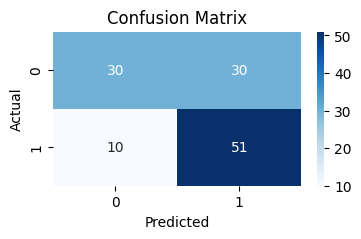

Confusion Matrix:
 [[30 30]
 [10 51]]
Accuracy: 0.48
Recall: 0.95
Precision: 0.49
F1 Score: 0.65


In [ ]:
# 모델로부터 예측을 수행합니다.
pred2 = conv.predict(x_test)
y_pred2 = np.where(pred2 > 0.5, 1, 0)

# Test 데이터 결과 Confusion Matrix 확인
confusion2 = confusion_matrix(y_test, y_pred2)

# Confusion matrix를 시각화합니다.
plt.figure(figsize=(4, 2))
sns.heatmap(confusion2, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
accuracy = accuracy_score(y_test, y_pred2)

# 재현율 계산
recall = recall_score(y_test, y_pred2)

# 정밀도 계산
precision = precision_score(y_test, y_pred2)

# F1 score 계산
f1 = f1_score(y_test, y_pred2)

# 결과 출력
print("Confusion Matrix:\n", confusion2)
print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

### (3) 모델 3
- **세부요구사항**
    - Conv2D, MaxPooling2D, Flatten, Dense 레이어들을 이용하여 모델을 설계
    - 학습시 validation_data로 validation set을 사용하시오.
    - 반드시 Early Stopping 적용
    - 평가시, confusion matrix, accuracy, recall, precision, f1 score 등을 이용하시오.

In [ ]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.backend import clear_session
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPool2D, Flatten

from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix

#### 1) 구조 설계

#### 2) 학습

#### 3) 성능 평가
* 평가는 confusion_matrix, classification_report 활용

## 4.모델링 II
* **세부요구사항**
    - 성능을 높이기 위해서 다음의 두가지를 시도해 봅시다.
        - Data Augmentation을 통해 데이터를 증가 시킵니다.
        - 사전 학습된 모델(Transfer Learning)을 가져다 사용해 봅시다.

### (1) Data Augmentation
- **세부요구사항**
    * 모델 학습에 이용할 이미지 데이터를 증강시키세요.
    * Keras의 ImageDataGenerator를 이용
        - [ImageDataGenerator document](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator)

    * ImageDatagenerator를 이용하여 학습
        * 모델 구조는 이미 생성한 1,2,3 중 하나를 선택하여 학습


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.backend import clear_session
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPool2D, Flatten

from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix

#### 1) ImageDataGenerator 생성
* ImageDataGenerator 함수 사용
    * 주요 옵션
        * rotation_range: 무작위 회전을 적용할 각도 범위
        * zoom_range: 무작위 줌을 적용할 범위 [1-zoom_range, 1+zoom_range]
        * horizontal_flip: 무작위 좌우반전을 적용할지 여부
        * vertical_flip: 무작위 상하반전을 적용할지 여부
        * rescale: 텐서의 모든 값을 rescale 값으로 나누어줌 (이 경우에는 255로 나누어서 0~1사이의 값으로 변경)

#### 2) 데이터 경로에서 이미지 불러 올 준비하기
* .flow_from_directory 이용
    * 디렉토리에서 이미지를 가져와서 데이터 증강을 적용하고 batch 단위로 제공하는 generator를 생성합니다.
    * 이미지를 불러올 때 target_size로 크기를 맞추고,
    * class_mode로 이진 분류(binary)를 수행하도록 지정합니다.


#### 3) 구조 설계

#### 4) 학습

#### 5) 성능 평가
* 평가는 confusion_matrix, classification_report 활용

### (2) Transfer Learning
- **세부요구사항**
    * VGG16 모델은 1000개의 클래스를 분류하는 데 사용된 ImageNet 데이터셋을 기반으로 사전 학습된 가중치를 가지고 있습니다.
        * 따라서 이 모델은 이미지 분류 문제에 대한 높은 성능을 보입니다.
        * 이 모델은 보통 전이학습(transfer learning)에서 기본적으로 사용되며, 특히 대규모 데이터셋이 없을 때는 기본 모델로 사용되어 fine-tuning을 수행합니다.
    * VGG16 함수로 부터 base_model 저장


#### 1) VGG16 불러와서 저장하기
* include_top=False로 설정하여 분류기를 제외하고 미리 학습된 가중치 imagenet을 로드합니다.
* .trainable을 False로 설정하여 모델의 모든 레이어들을 Frozen 시켜 가중치를 고정합니다.


In [ ]:
base_model = VGG16(weights='imagenet', include_top=False)

# 모든 레이어의 가중치를 고정합니다.
for layer in base_model.layers:
    layer.trainable = False

# 모델 구조를 출력합니다.
base_model.summary()



58889256/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                              

#### 2) VGG16과 연결한 구조 설계
* VGG16을 불러와서 Flatten, Dense 등으로 레이어 연결하기

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# VGG16 모델을 불러옵니다.
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(280, 280, 3))

# 모든 레이어의 가중치를 고정합니다.
for layer in base_model.layers:
    layer.trainable = False

# Flatten 레이어를 추가합니다.
x = Flatten()(base_model.output)

# 하나 이상의 Dense 레이어를 추가합니다. 이 예제에서는 1024개의 뉴런을 가진 하나의 레이어를 추가합니다.
x = Dense(1024, activation='relu')(x)

# 최종 출력 레이어를 추가합니다. 이진 분류의 경우, 뉴런 수는 1이며 활성화 함수는 sigmoid를 사용합니다.
output = Dense(1, activation='sigmoid')(x)

# 새로운 모델을 생성합니다.
transfer_model = Model(inputs=base_model.input, outputs=output)

# 모델을 컴파일합니다.
transfer_model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=Adam())

# 모델 구조를 출력합니다.
transfer_model.summary()


Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 280, 280, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 280, 280, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 280, 280, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 140, 140, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 140, 140, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 140, 140, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 70, 70, 128)       0   

#### 3) 학습
- **세부요구사항**
    - 모델 학습 과정에 알맞은 보조 지표를 사용하세요.
    - 데이터
        - Data Augmentation에서 생성한 ImageDataGenerator를 학습에 이용하세요.
        - Early Stopping을 반드시 사용하세요.
        - 최적의 가중치를 모델에 적용하세요.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

# 데이터 증강을 위한 ImageDataGenerator를 생성합니다.
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
train_generator = train_datagen.flow_from_directory(
    directory=train_path,
    target_size=(280,280),
    class_mode='binary',
    batch_size=64)

valid_generator = valid_datagen.flow_from_directory(
    directory=valid_path,
    target_size=(280,280),
    class_mode='binary',
    batch_size=64)


# 모델 학습 과정에 사용할 보조 지표를 정의합니다.
# 이 예시에서는 정확도와 손실을 모니터링합니다.
metrics = ['accuracy', 'loss']



Found 388 images belonging to 2 classes.
Found 96 images belonging to 2 classes.


#### 4) 성능 평가

Epoch 1/100
7/7 [==============================] - 32s 5s/step - loss: 0.0119 - accuracy: 1.0000 - val_loss: 0.1007 - val_accuracy: 0.9583
Epoch 2/100
7/7 [==============================] - 31s 5s/step - loss: 0.0070 - accuracy: 1.0000 - val_loss: 0.1574 - val_accuracy: 0.9479
Epoch 3/100
7/7 [==============================] - 26s 4s/step - loss: 0.0080 - accuracy: 0.9948 - val_loss: 0.1014 - val_accuracy: 0.9792
Epoch 4/100
7/7 [==============================] - 28s 4s/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.0732 - val_accuracy: 0.9688
Epoch 5/100
7/7 [==============================] - 27s 4s/step - loss: 0.0094 - accuracy: 0.9974 - val_loss: 0.0212 - val_accuracy: 0.9896
Epoch 6/100
7/7 [==============================] - 27s 4s/step - loss: 0.0118 - accuracy: 0.9948 - val_loss: 0.2133 - val_accuracy: 0.9583
Epoch 7/100
7/7 [==============================] - 27s 4s/step - loss: 0.0155 - accuracy: 0.9948 - val_loss: 0.0942 - val_accuracy: 0.9792
Epoch 8/100
7/7 [==========

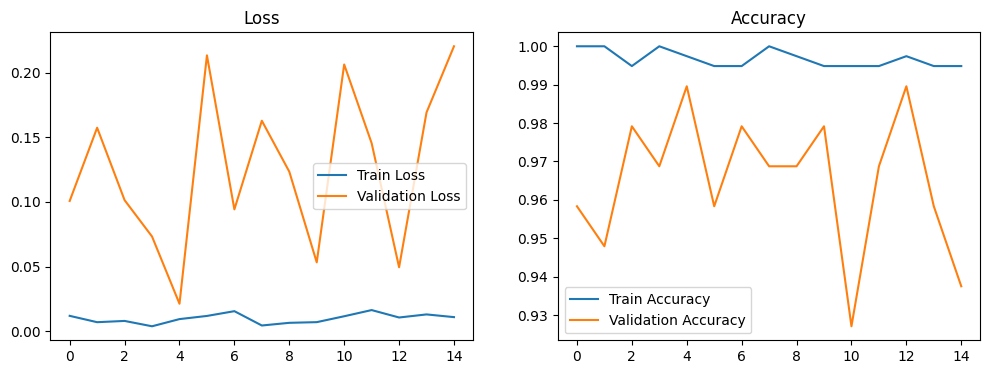

In [ ]:
# Early Stopping 콜백을 설정합니다.
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# ModelCheckpoint 콜백을 설정하여 최적 가중치를 저장합니다.
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, save_weights_only=True, monitor='val_loss')

# 모델을 학습합니다.
history = transfer_model.fit(
    train_generator,
    epochs=100, # 적절한 에포크 횟수를 설정하세요.
    validation_data=valid_generator,
    callbacks=[early_stopping, model_checkpoint],
)


# 모델 학습 과정을 시각화합니다.
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')
plt.show()


1/1 [==============================] - 0s 24ms/step


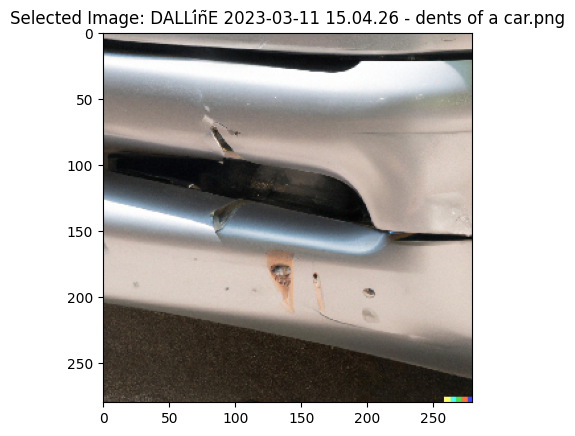

예측 결과: abnormal
실제 결과: abnormal


In [ ]:
import os
import random
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

# 테스트 이미지 파일 경로 설정
test_dir = '/content/drive/MyDrive/Datasets/Car_images/test'

# 정상과 비정상 클래스 설정
class_names = ['normal', 'abnormal']

# 무작위 이미지 선택
random_class = random.choice(class_names)
random_image = random.choice(os.listdir(os.path.join(test_dir, random_class)))

# 선택한 이미지 파일 경로
image_path = os.path.join(test_dir, random_class, random_image)

# 이미지를 모델에 입력할 수 있는 형식으로 변환
img = load_img(image_path, target_size=(280, 280))  # VGG16 기반으로 훈련한 모델을 위해 크기 조정
img = img_to_array(img)
img = np.expand_dims(img, axis=0)  # 배치 차원 추가
img = img / 255.0  # 정규화

# 모델을 사용하여 이미지 분류
result = transfer_model.predict(img)

# 예측 결과 출력
predicted_class = class_names[int(round(result[0][0])) - 1]

# 실제 결과 추출 (파일 이름에서 클래스 추출)
actual_class = random_class

# 이미지 출력
plt.imshow(img[0])
plt.title(f'Selected Image: {random_image}')
plt.show()

# 예측 결과와 실제 결과 출력
print(f'예측 결과: {predicted_class}')
print(f'실제 결과: {actual_class}')


In [ ]:
import os
import random
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

# 테스트 이미지 파일 경로 설정
test_dir = '/content/drive/MyDrive/Datasets/Car_images/test'

# 정상과 비정상 클래스 설정
class_names = ['normal', 'abnormal']

# 잘못된 예측을 저장할 리스트
misclassified_images = []

# 정상에서 비정상으로 잘못 판단된 이미지 찾기
for image_file in os.listdir(os.path.join(test_dir, 'normal')):
    image_path = os.path.join(test_dir, 'normal', image_file)

    # 이미지를 모델에 입력할 수 있는 형식으로 변환
    img = load_img(image_path, target_size=(280, 280))
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = img / 255.0

    # 모델을 사용하여 이미지 분류
    result = transfer_model.predict(img)
    predicted_class = class_names[int(round(result[0][0])) - 1]
    actual_class = 'normal'

    # 잘못된 예측을 확인하고 리스트에 추가
    if predicted_class == 'abnormal':
        misclassified_images.append((image_path, actual_class, predicted_class))

# 비정상에서 정상으로 잘못 판단된 이미지 찾기
for image_file in os.listdir(os.path.join(test_dir, 'abnormal')):
    image_path = os.path.join(test_dir, 'abnormal', image_file)

    # 이미지를 모델에 입력할 수 있는 형식으로 변환
    img = load_img(image_path, target_size=(280, 280))
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = img / 255.0

    # 모델을 사용하여 이미지 분류
    result = transfer_model.predict(img)
    predicted_class = class_names[int(round(result[0][0])) - 1]
    actual_class = 'abnormal'

    # 잘못된 예측을 확인하고 리스트에 추가
    if predicted_class == 'normal':
        misclassified_images.append((image_path, actual_class, predicted_class))

# 임의로 잘못 판단된 이미지 선택
random_misclassified_image = random.choice(misclassified_images)

1/1 [==============================] - 0s 18ms/step


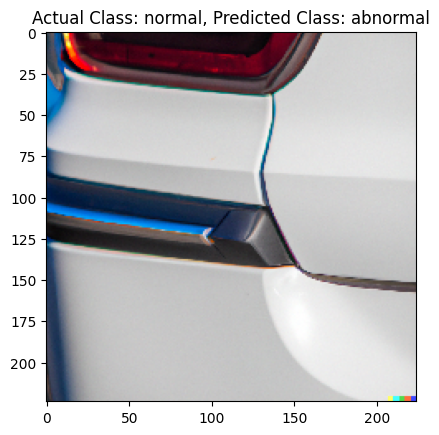

Accuracy: 59.50%


In [ ]:
# 이미지 출력
image_path, actual_class, predicted_class = random_misclassified_image
img = load_img(image_path, target_size=(224, 224))
plt.imshow(img)
plt.title(f'Actual Class: {actual_class}, Predicted Class: {predicted_class}')
plt.show()
# 정확도 계산
total_misclassified = len(misclassified_images)
total_test_images = len(os.listdir(os.path.join(test_dir, 'normal'))) + len(os.listdir(os.path.join(test_dir, 'abnormal')))
accuracy = 1.0 - (total_misclassified / total_test_images)
print(f'Accuracy: {accuracy:.2%}')



In [ ]:

.